## Problem Statement

### Context


AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help


### Objective

To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.


###  Data Description

The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

**Data Dictionary**

- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of Visits that customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

### **Please read the instructions carefully before starting the project.** 


This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. 
* Blanks '_______' are provided in the notebook that 
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space. 
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black


# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
#!pip install yellowbrick # !pip install yellowbrick v 1.5 
#conda install -c conda-forge yellowbrick
#conda install -c districtdatalabs yellowbrick
#pip install -U yellowbrick
#$ pip install -U yellowbrick
#pip install yellowbrick==
#python --version
#pip install yellowbrick --user
#import yellowbrick
#pip install yellowbrick
#pip install -U scikit-learn -user
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler
# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
data = pd.read_excel('Credit+Card+Customer+Data.xlsx')
## Complete the code to import the data

## Overview of the Dataset

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [3]:
# checking shape of the data
#print('Number of rows: ', data.shape[0], ' --- Number of columns: ', data.shape[1])
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.") ## Complete the code to get the shape of data

There are 660 rows and 7 columns.


### Displaying few rows of the dataset

In [4]:
# viewing the first 5 rows of the data
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### Creating a copy of original data

In [5]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

In [6]:
# fixing column names
df.columns = [c.replace(" ", "_") for c in df.columns]

### Checking the data types of the columns for the dataset

In [7]:
# checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer_Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


- All the columns in the data are numeric.

### Checking the missing values 

In [8]:
# checking for missing values
df.isnull().sum()

Sl_No                  0
Customer_Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

- There are no missing values in the data.

In [9]:
# checking the number of unique values in each column
data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

### Checking for duplicates values

**Let's look at the duplicate values in the *Customer_Key* column closely.**

In [10]:
# getting the count for each unique value in Customer_Key
data_grouped = df.groupby("Customer_Key").count()

for i in data_grouped.loc[data_grouped.Sl_No >= 2].index:
    display(df.loc[df.Customer_Key == i])

,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2


,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0


,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2


,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2


,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


In [11]:
df.drop(columns=["Sl_No"], inplace=True) # complete the code to drop the columns 
#df.drop(columns=["____"], inplace=True) # complete the code to drop the columns 

### Statistical summary of the dataset

In [12]:
# Let's look at the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.5,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.0,10.0


## Exploratory Data Analysis

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate analysis

**Let's see the distribution of different variables in the dataset**

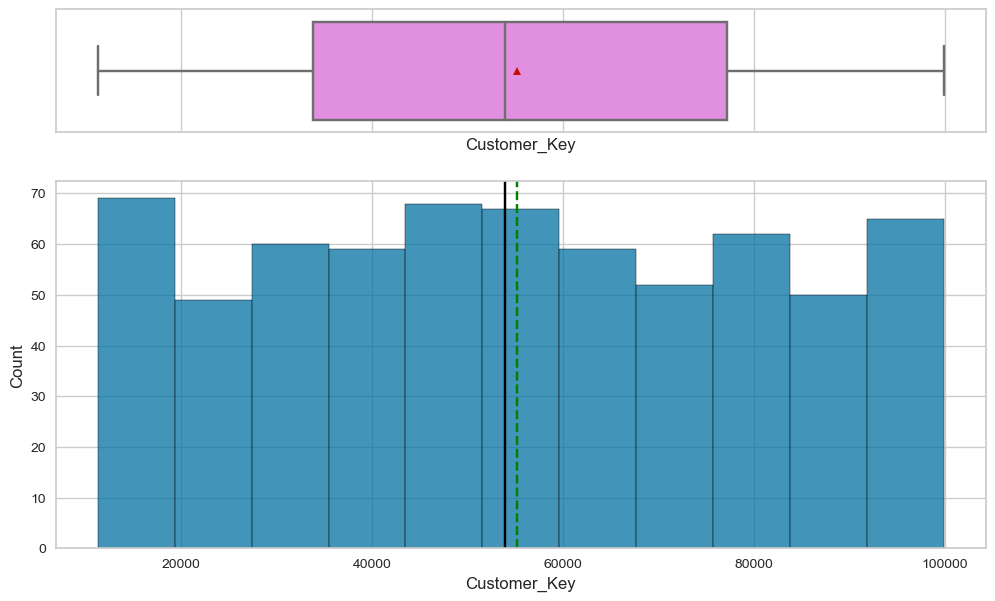

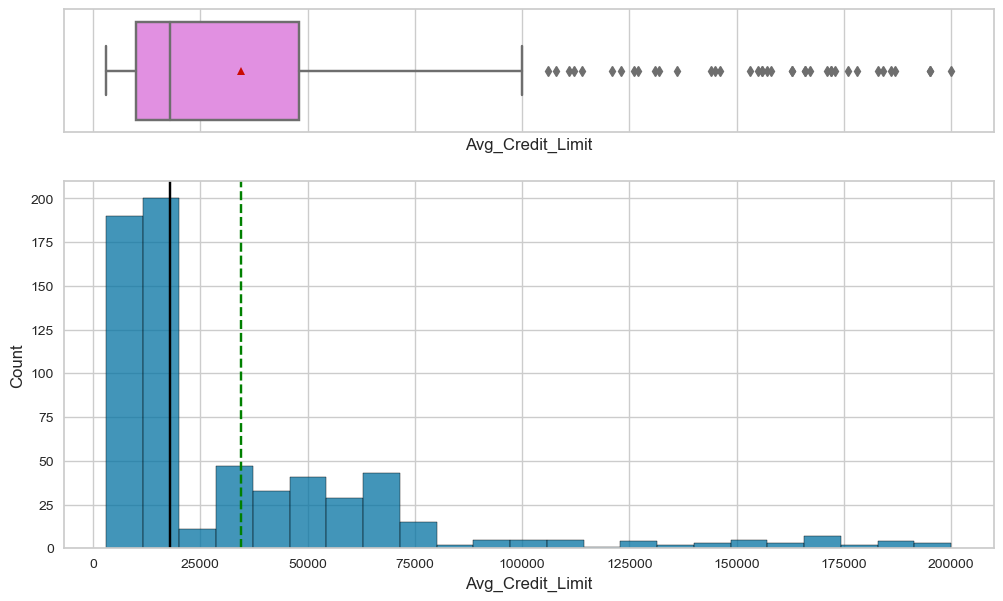

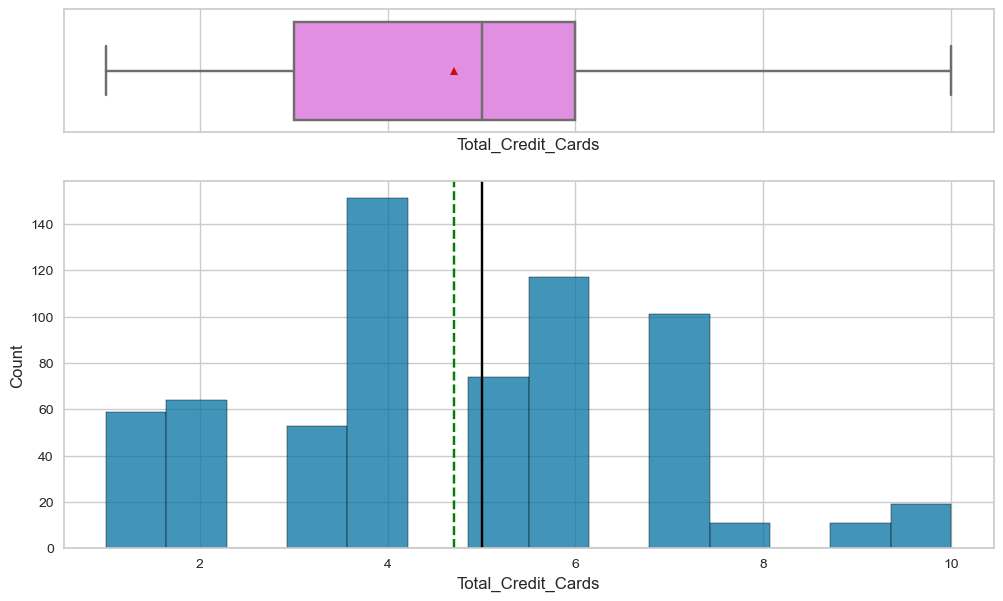

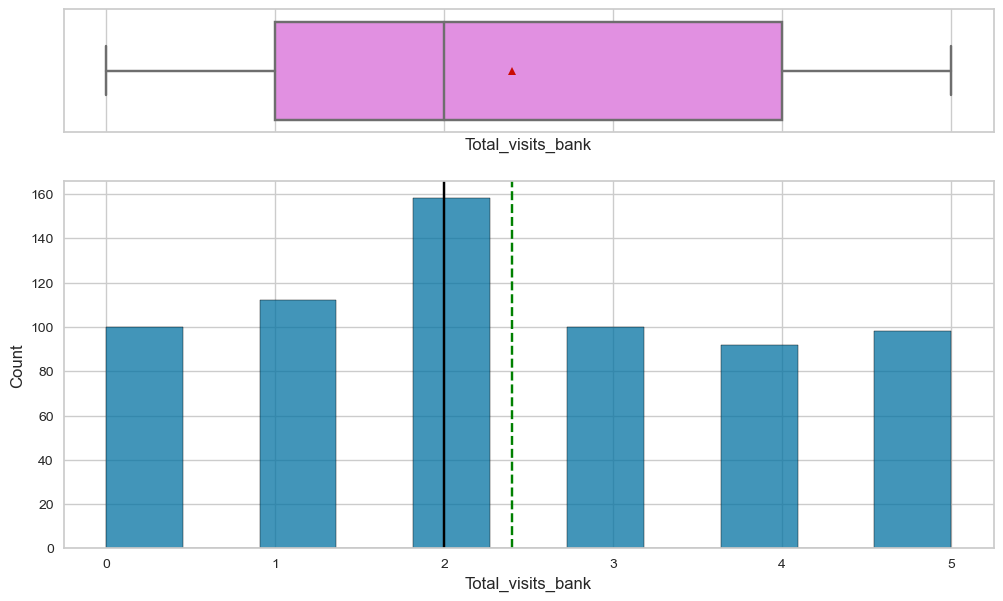

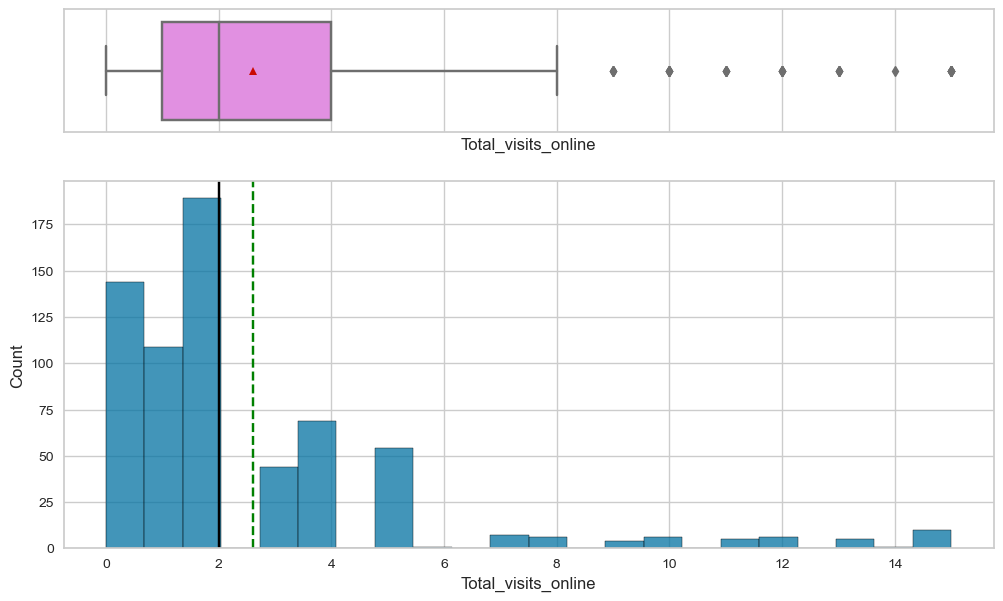

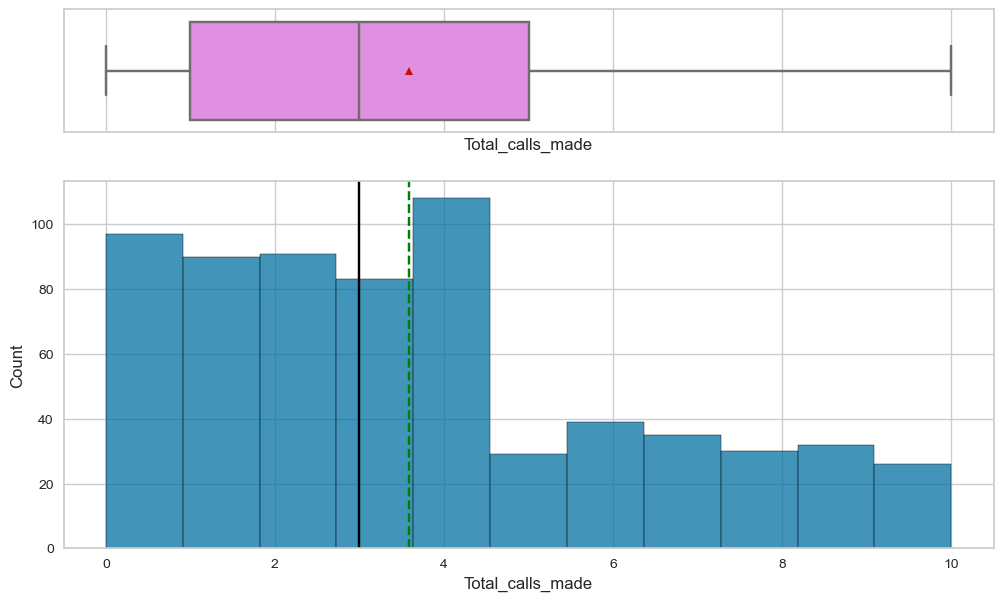

In [15]:
for col in df.columns:
    histogram_boxplot(df, col)

In [ ]:
Observations

Avg credit limit and total visit online have right-skewed distributions with upper outliers, which indicates the presence of customers with very high credit limit & visit online.
The average total credit cards is 5 & the avg total visit bank is 2.
Rating is left-skewed and most of the ratings are between 2.5 and 4.5.
The maximum total calls made are 10

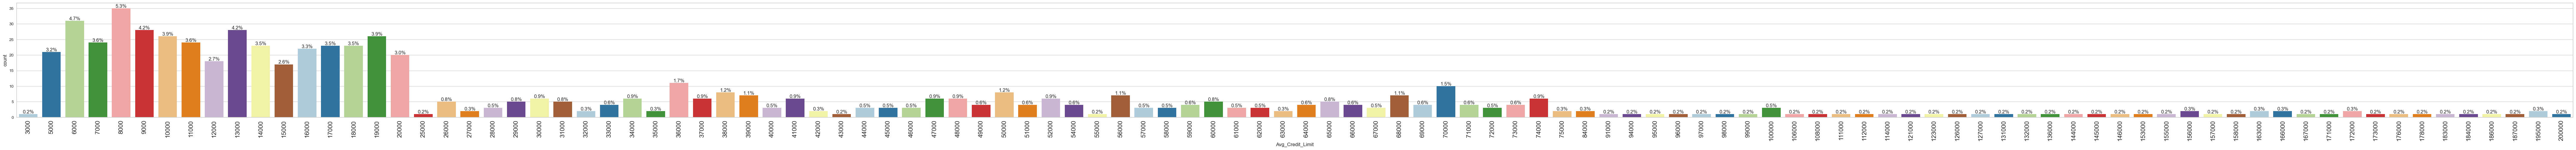

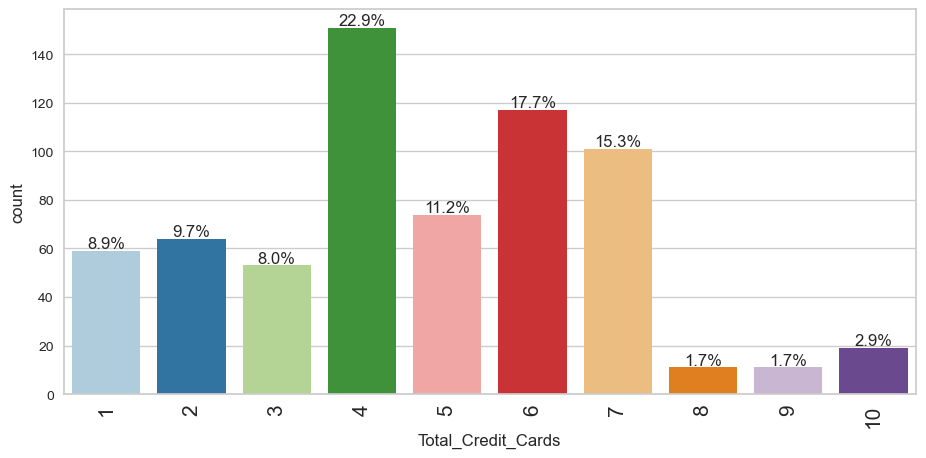

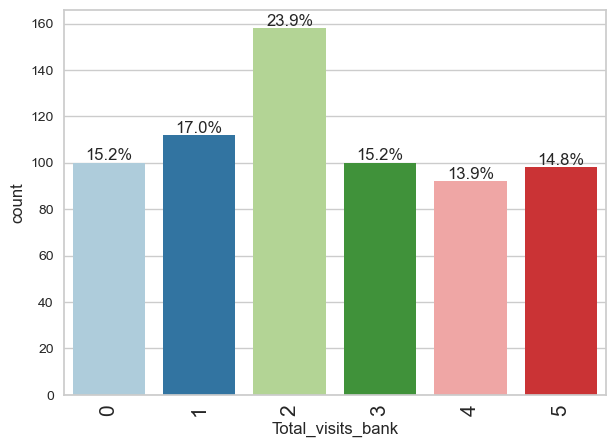

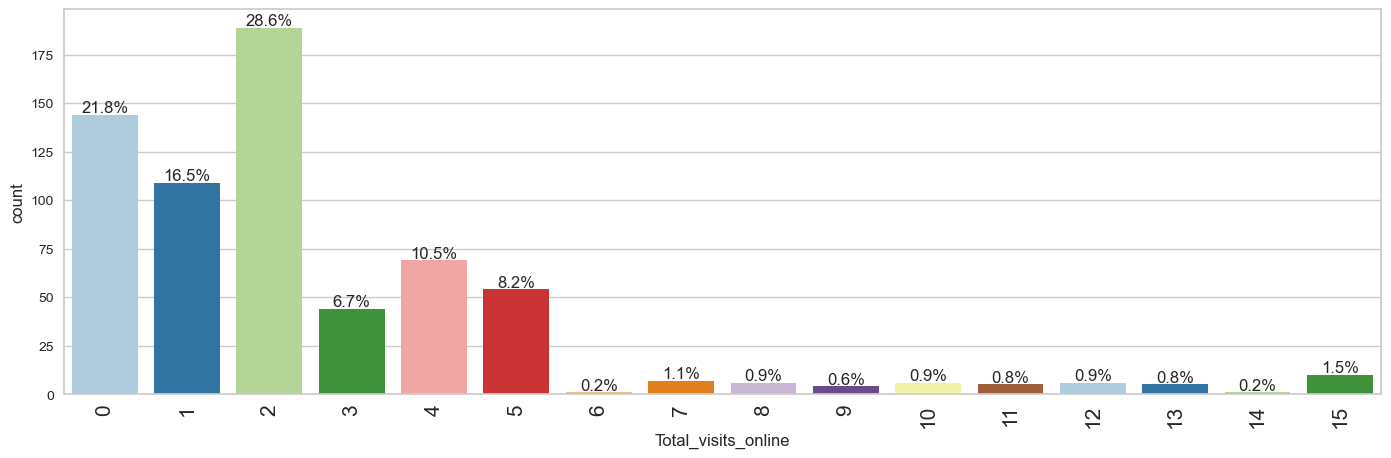

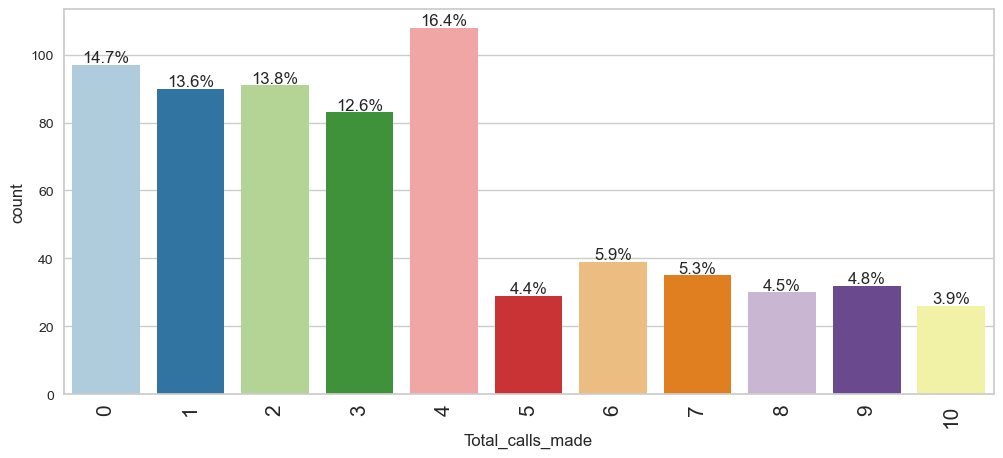

In [16]:
for col in df.columns.tolist()[1:]:
    labeled_barplot(df, col, perc=True)

Observations:
22.9% of the customers of the bank have 4 credit cards
23.9% of the customers of the bank have 2 total visits to the bank
28.6% bank customers have 2  total visit online
16.4% bank customers have 4 total calls made

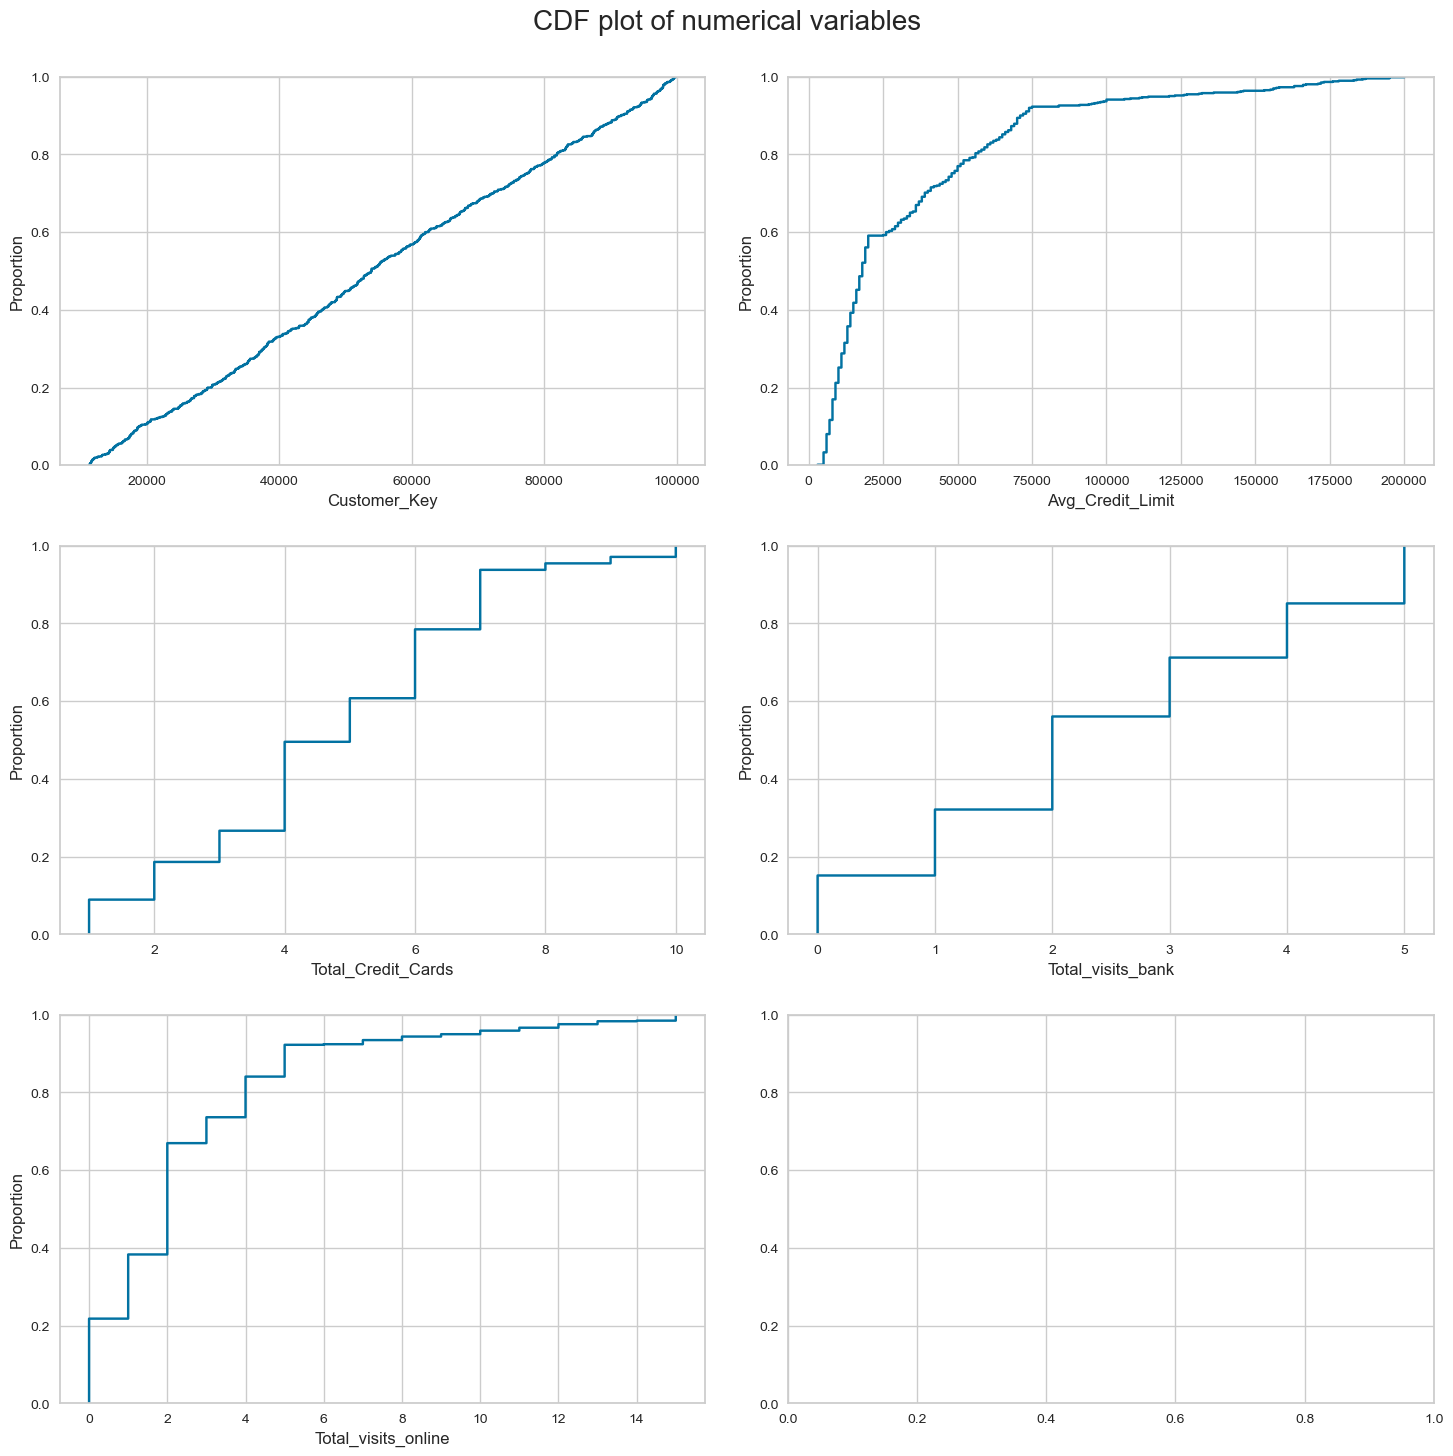

In [17]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)

counter = 0

for ii in range(3):
    sns.ecdfplot(data=df, ax=axes[ii][0], x=df.columns.tolist()[counter])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(data=df, ax=axes[ii][1], x=df.columns.tolist()[counter])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

Observations:
90% of bank   customers have 75000 average credit card limit
95% of bank customers  have 8 credit cards
75% bank customers have 4 visits to the bank
The maximum visit online is 15

### Bivariate Analysis

**Let's check for correlations.**

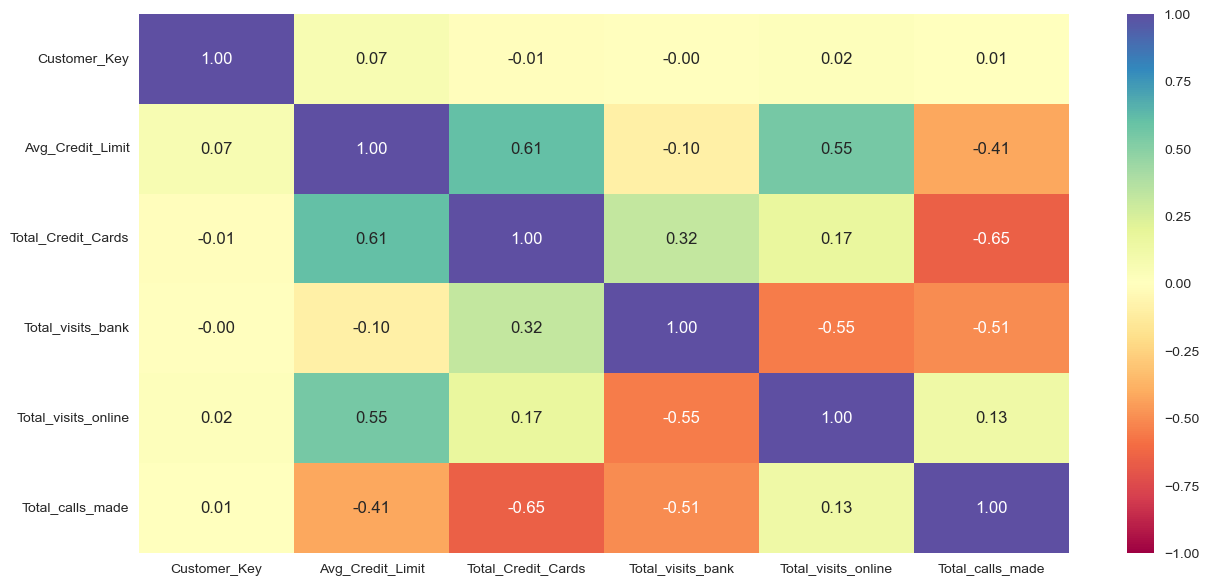

In [18]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observations:
- Average credit limit and total credit cards have a high to moderate correlation
- Total calls made and total credit cards have a negative correlation.

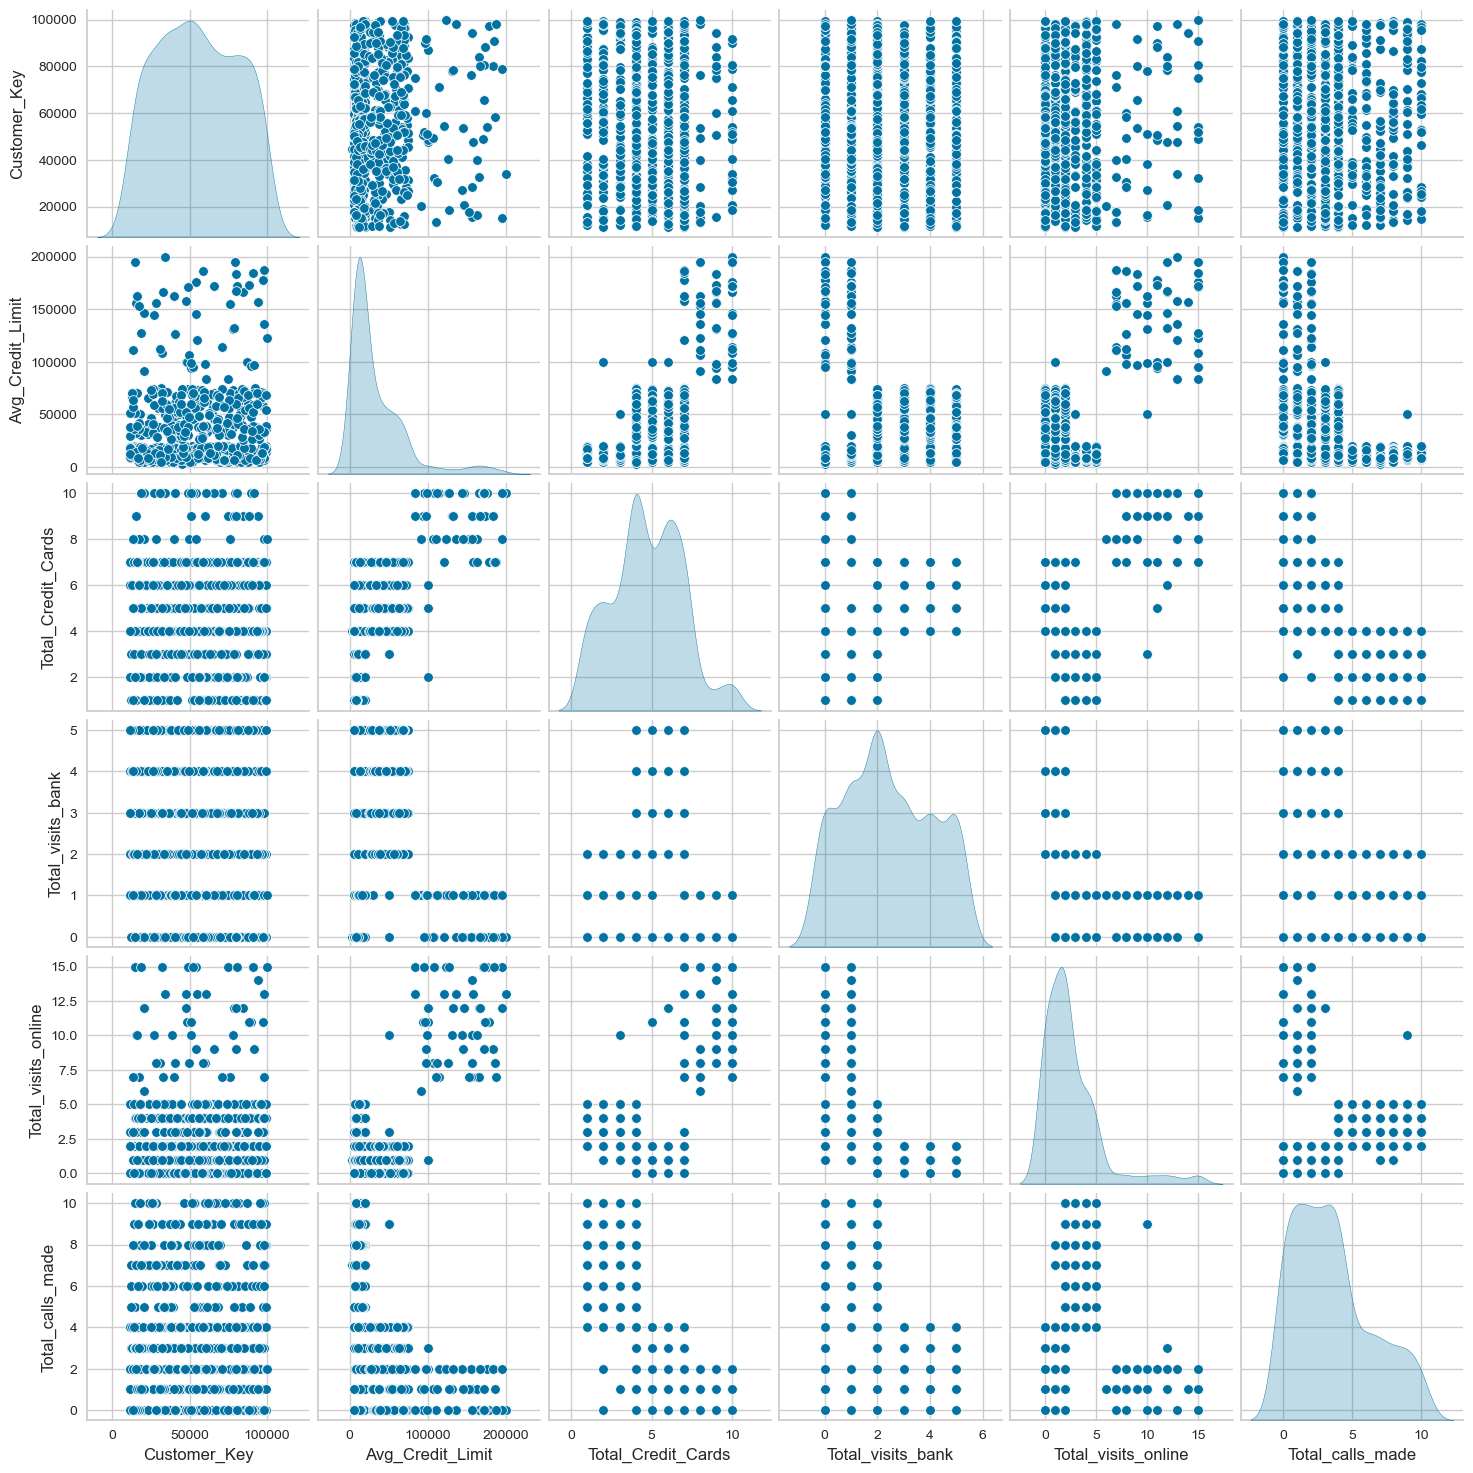

In [19]:
sns.pairplot(data=df, diag_kind="kde")
plt.show()

Observations:
The maximum avg credit card limit is 200000
The average of total credit cards are 5

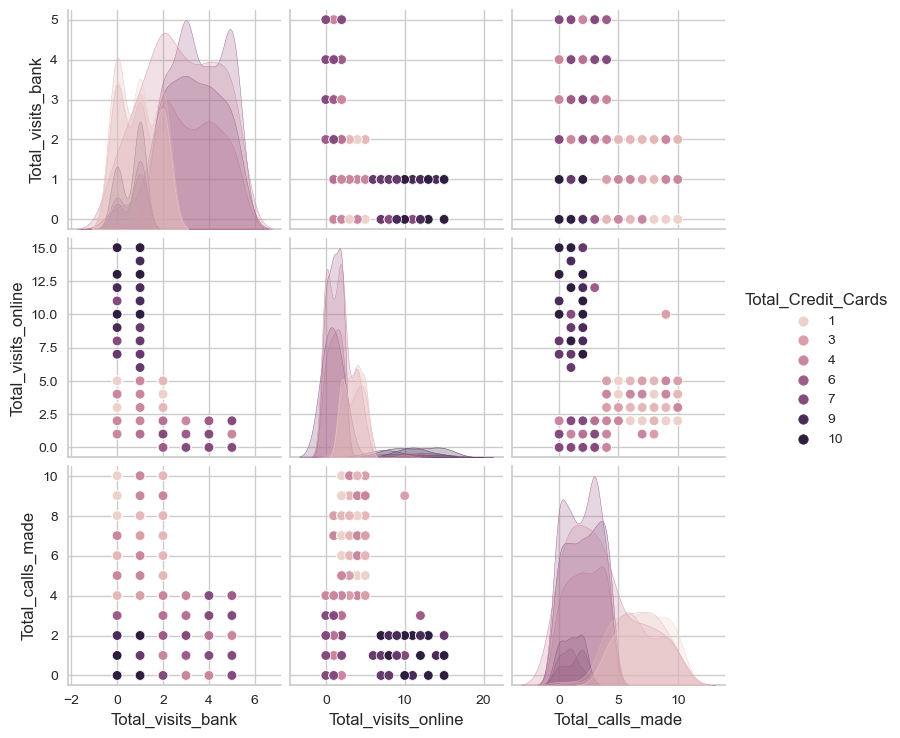

In [20]:
sns.pairplot(
    data=df[
        [
            "Total_visits_bank",
            "Total_visits_online",
            "Total_calls_made",
            "Total_Credit_Cards",
        ]
    ],
    hue="Total_Credit_Cards",
)

plt.show()

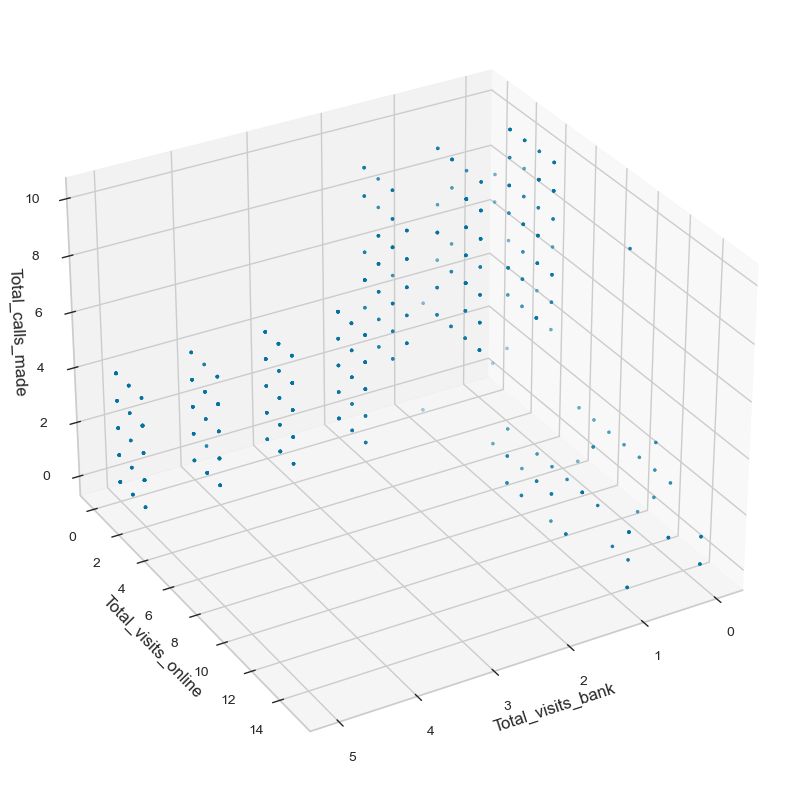

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

x = df["Total_visits_bank"]
y = df["Total_visits_online"]
z = df["Total_calls_made"]


ax.scatter(x, y, z, marker=".")
ax.set_xlabel("Total_visits_bank")
ax.set_ylabel("Total_visits_online")
ax.set_zlabel("Total_calls_made")
ax.view_init(azim=60)
plt.show()

## Data Preprocessing

### Outlier Detection

- Let's find outliers in the data using z-score with a threshold of 3.

In [22]:
threshold = 3 # wite the value of the threshold 
outlier = {}
for col in df.columns:
    i = df[col]
    mean = np.mean(df[col])
    std = np.std(df[col])
    list1 = []
    for v in i:
        z = (v - mean) / std
        if z > threshold:
            list1.append(v)
    list1.sort()
    outlier[i.name] = list1

print("The following are the outliers in the data:")
for key, value in outlier.items():
    print("\n", key, ":", value)

The following are the outliers in the data:

 Customer_Key : []

 Avg_Credit_Limit : [153000, 155000, 156000, 156000, 157000, 158000, 163000, 163000, 166000, 166000, 167000, 171000, 172000, 172000, 173000, 176000, 178000, 183000, 184000, 186000, 187000, 195000, 195000, 200000]

 Total_Credit_Cards : []

 Total_visits_bank : []

 Total_visits_online : [12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]

 Total_calls_made : []


### Scaling

- Let's scale the data before we proceed with clustering.

In [23]:
# scaling the data before clustering
scaler = StandardScaler()
subset =  df.copy()  ## Complete the code to scale the data
subset_scaled = scaler.fit_transform(subset)

In [24]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## K-means Clustering

### Checking Elbow Plot

In [25]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 2 	Average Distortion: 2700.9848113806484
Number of Clusters: 3 	Average Distortion: 1592.8133253795966
Number of Clusters: 4 	Average Distortion: 1309.5101821443154
Number of Clusters: 5 	Average Distortion: 1139.452938183989
Number of Clusters: 6 	Average Distortion: 1051.133158506308
Number of Clusters: 7 	Average Distortion: 986.6662221423317
Number of Clusters: 8 	Average Distortion: 940.3036209944809
Number of Clusters: 9 	Average Distortion: 892.3679531795486
Number of Clusters: 10 	Average Distortion: 859.6909761538865


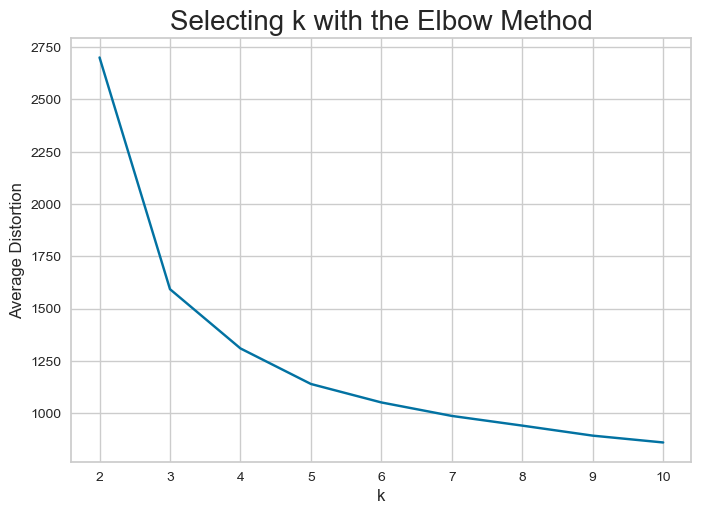

In [26]:
clusters = range(2, 11)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = sum(
        np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1) ** 2)

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

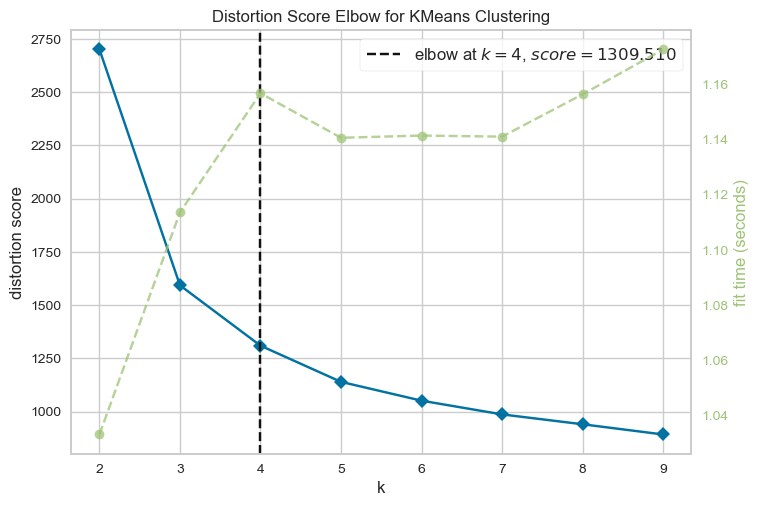

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 10), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

### Let's check the silhouette scores

In [28]:
sil_score = []
cluster_list = range(2, 10)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, the silhouette score is 0.33817196365464486)
For n_clusters = 3, the silhouette score is 0.4177434852377372)
For n_clusters = 4, the silhouette score is 0.3228907072652812)
For n_clusters = 5, the silhouette score is 0.2850863954249504)
For n_clusters = 6, the silhouette score is 0.25422115827085306)
For n_clusters = 7, the silhouette score is 0.23773673231415773)
For n_clusters = 8, the silhouette score is 0.2250833601258058)
For n_clusters = 9, the silhouette score is 0.20656573198045716)


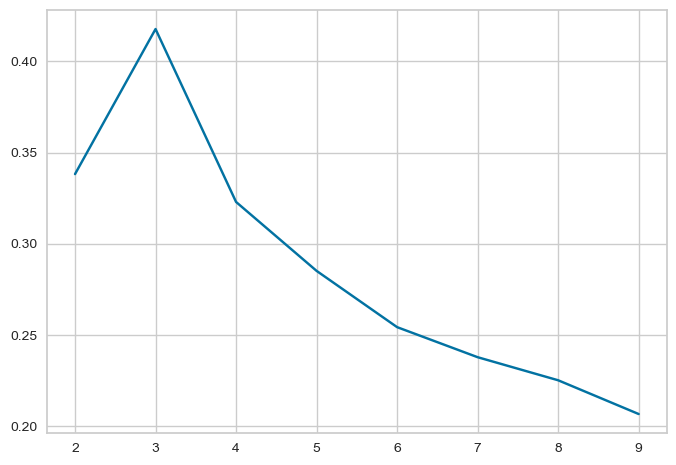

In [29]:
plt.plot(cluster_list, sil_score)
plt.show()

**Let's visualize the silhouette scores for different number of clusters**

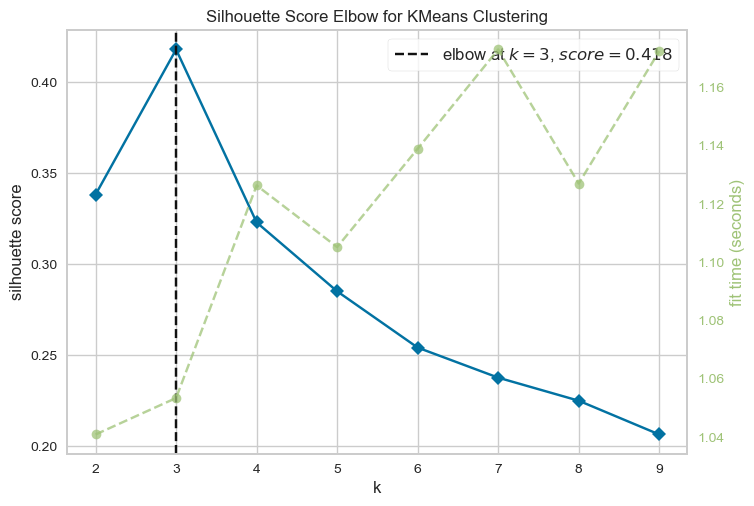

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [30]:
#model = KMeans(random_state=1)
#visualizer = KElbowVisualizer(model, k=(2, 10), timings=True)
#visualizer.fit(k_means_df)  # fit the data to the visualizer
#visualizer.show()  # finalize and render figure

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 10), metric="silhouette", timings=True) ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

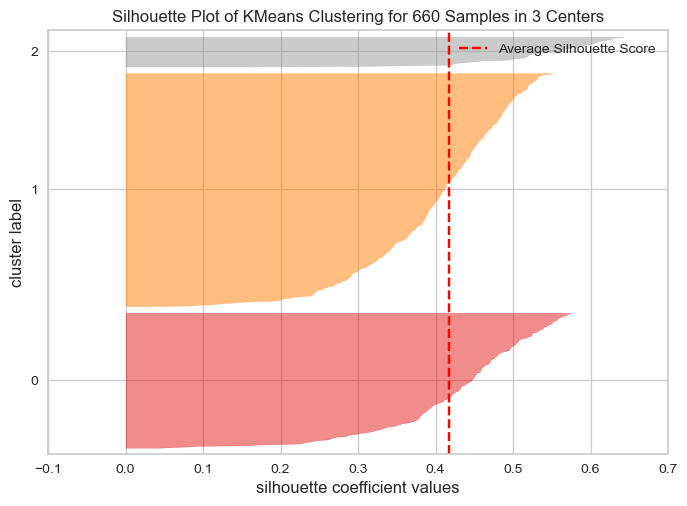

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [31]:
# finding optimal no. of clusters with silhouette coefficients
#visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
#visualizer.fit(subset_scaled_df)
#visualizer.show()

# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

From the above plot, we can observe that cluster with label 1 has a big number of observations (Width), and label 2 has a very small number of observations so k=3 will not be an appropriate value. 

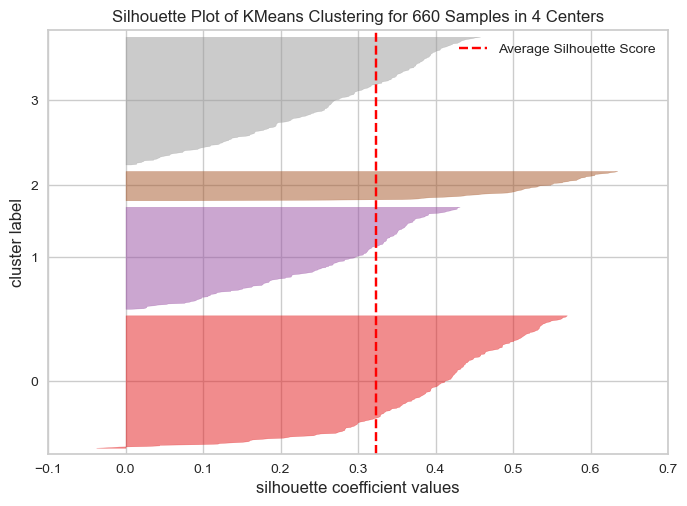

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [32]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

We can see from the plot above that all the clusters meet the requirements. All the clusters have crossed Avg silhouette score, all the clusters have different silhouette scores and have different width sizes. So, let's take 4 as the appropriate no. of clusters(K) as the silhouette score is high enough for all the 4-clusters(above average silhouette score), and there is a knick at 4 in the elbow curve

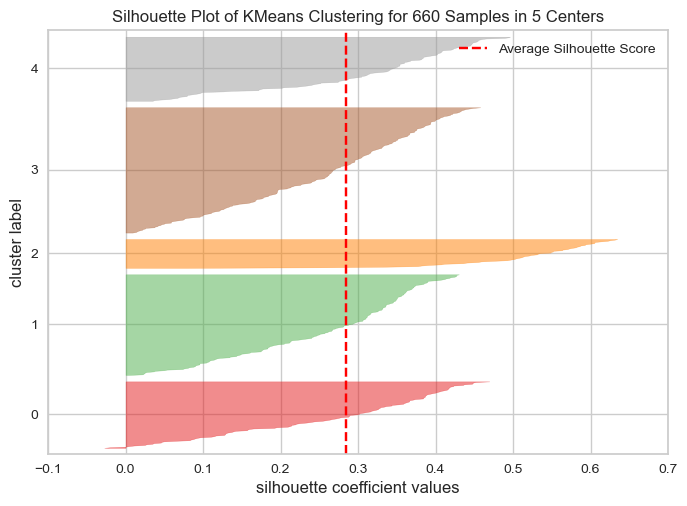

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [33]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

From the above plot, we can see that all the all the clusters have crossed Avg silhoutte score, all the clusters have different silhoutte score and have different width size, but the silhoutte score is low. Let's visualize K=6.

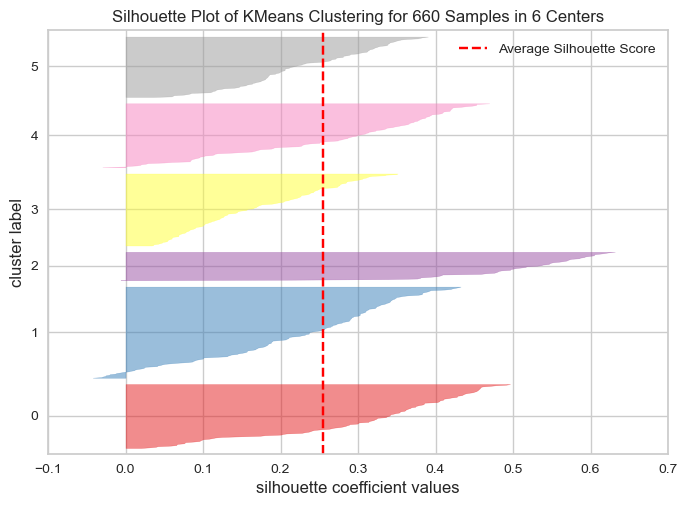

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [34]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

From the above plot, we can see that all the clusters have crossed Avg silhouette score, all the clusters have different silhouette scores and have different width sizes, but there is no elbow at K=6, so k=6 will not be an appropriate value.

### Creating Final Model

In [35]:
%%time
kmeans = KMeans(n_clusters=4, random_state=1)  ## Complete the code to choose the number of clusters
kmeans.fit(k_means_df)

CPU times: total: 9.16 s
Wall time: 1.03 s


KMeans(n_clusters=4, random_state=1)

In [36]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["K_means_segments"] = kmeans.labels_
df1["K_means_segments"] = kmeans.labels_

## Hierarchical Clustering

### Computing Cophenetic Correlation

In [37]:
hc_df = subset_scaled_df.copy()

In [38]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"] ## Complete the code to add distance metrics

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"] ## Complete the code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.715826147503084.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8333358686900459.
Cophenetic correlation for Euclidean distance and average linkage is 0.8684228720933057.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8642251666438747.
Cophenetic correlation for Chebyshev distance and single linkage is 0.6993328509872334.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.7832281429250633.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8628342866871905.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8345913036690694.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.6829750720107937.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6051316784974621.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.7754307051655686.
Cophenetic cor

In [39]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8684228720933057, which is obtained with Euclidean distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [40]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] ## Complete the code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.715826147503084.
Cophenetic correlation for complete linkage is 0.8333358686900459.
Cophenetic correlation for average linkage is 0.8684228720933057.
Cophenetic correlation for centroid linkage is 0.8656427328161594.
Cophenetic correlation for ward linkage is 0.7067190998109724.
Cophenetic correlation for weighted linkage is 0.8642251666438747.


In [41]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print()
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)


Highest cophenetic correlation is 0.8684228720933057, which is obtained with average linkage.


### Checking Dendrograms

**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**


**Let's view the dendrograms for the different linkage methods.**

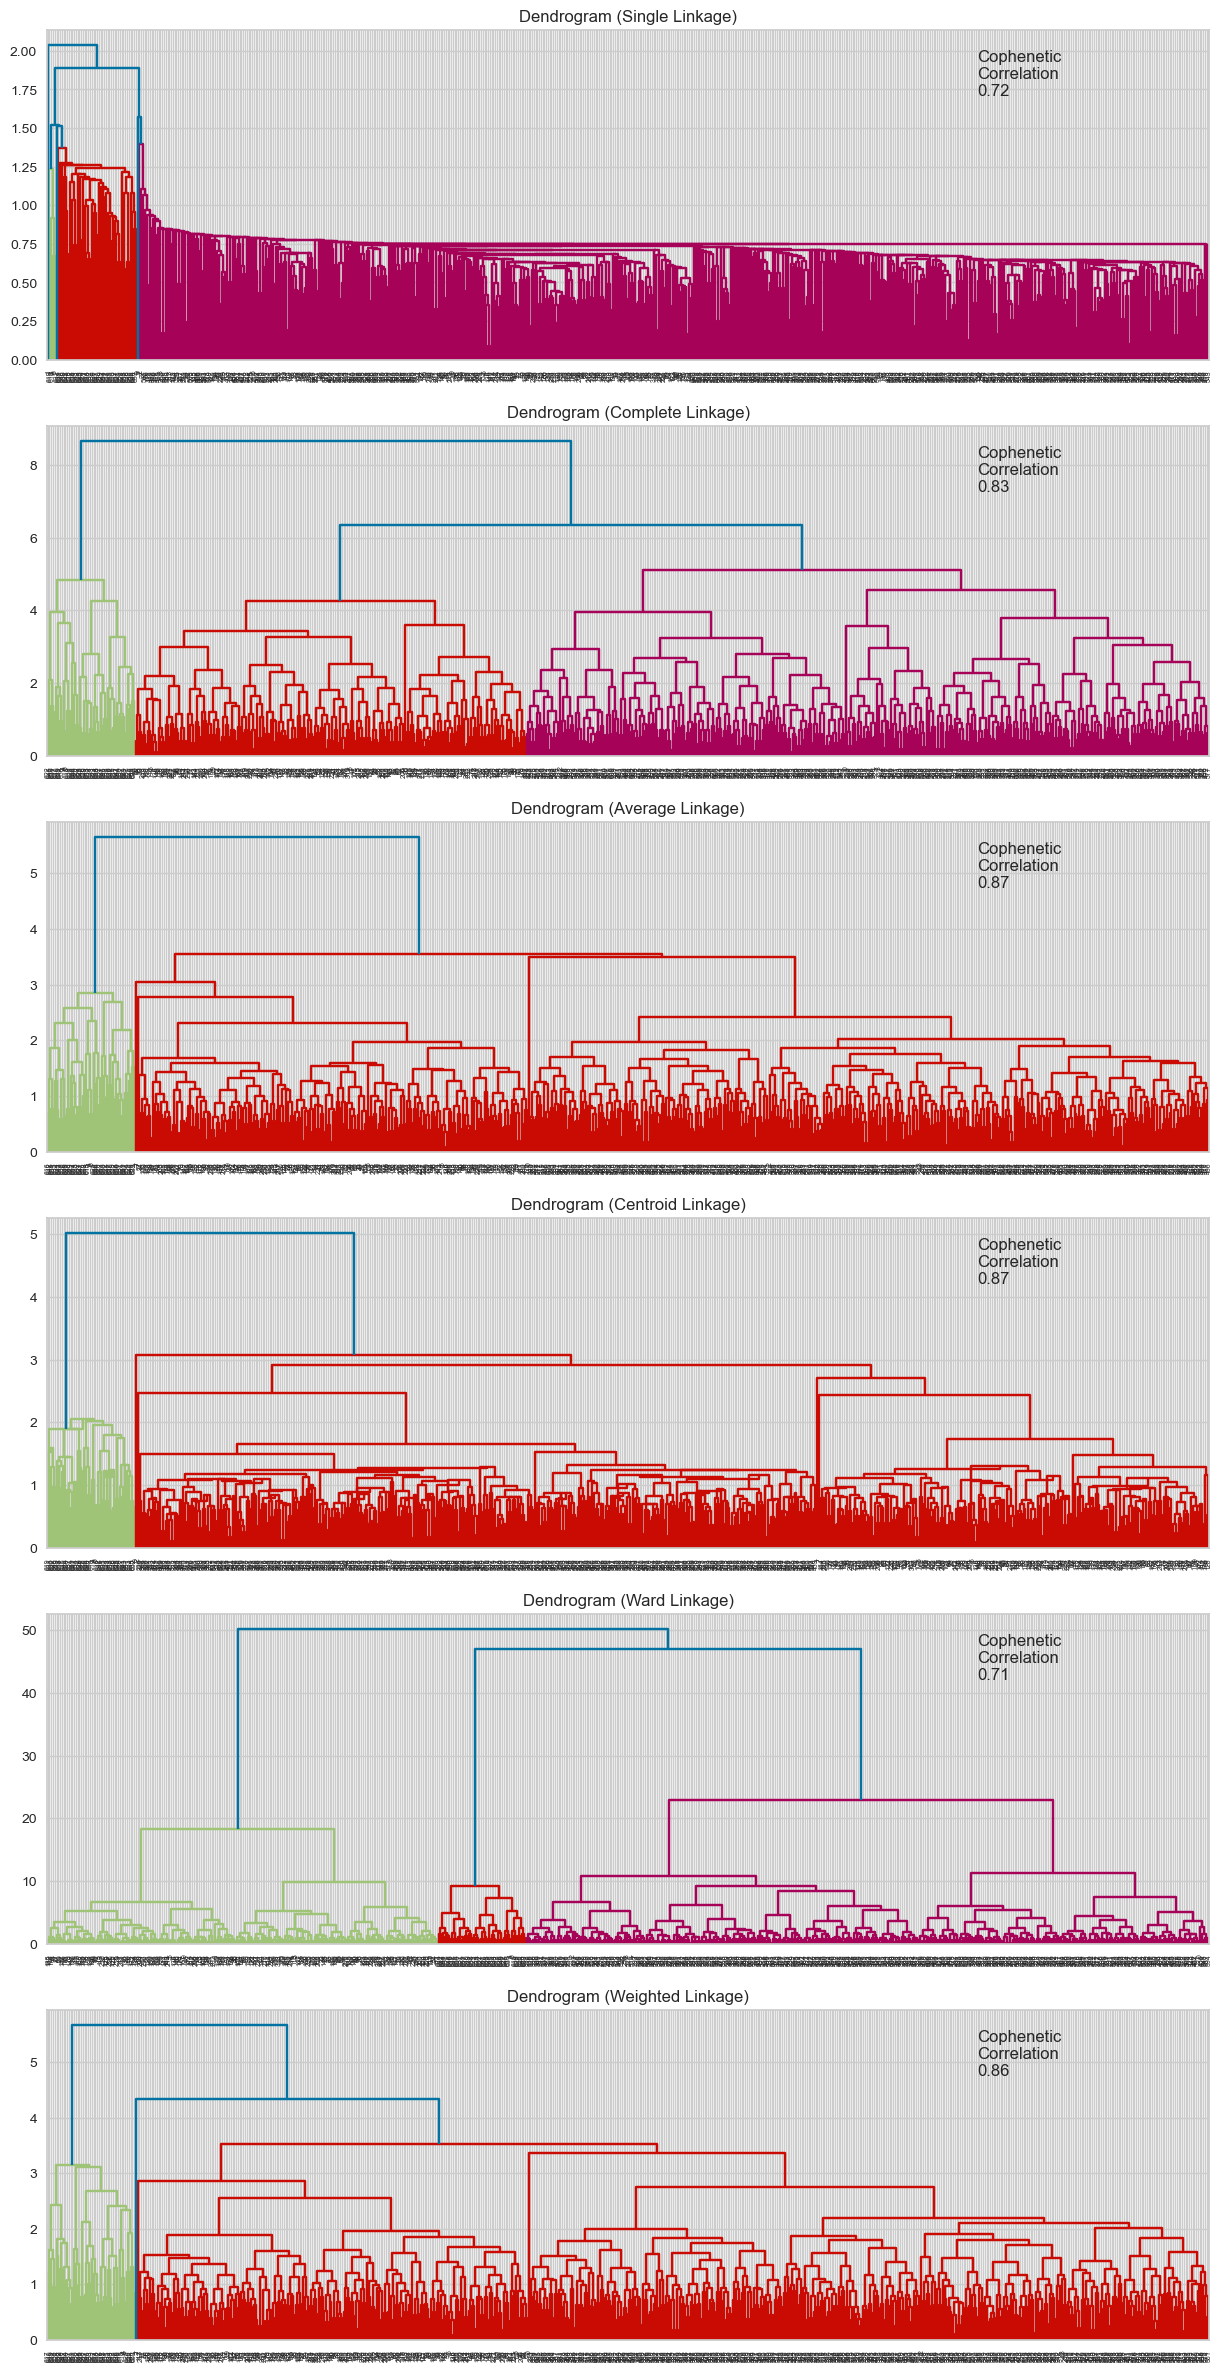

In [42]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] ## Complete the code to add linkages

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

Observations

The cophenetic correlation is highest for average and centroid linkage methods.
We will move ahead with Average linkage.
4 appears to be the appropriate number of clusters from the dendrogram for Average linkage.

**Dendrogram with average linkage shows distinct and separate cluster tree.**

In [43]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.706719
0,single,0.715826
1,complete,0.833336
5,weighted,0.864225
3,centroid,0.865643
2,average,0.868423


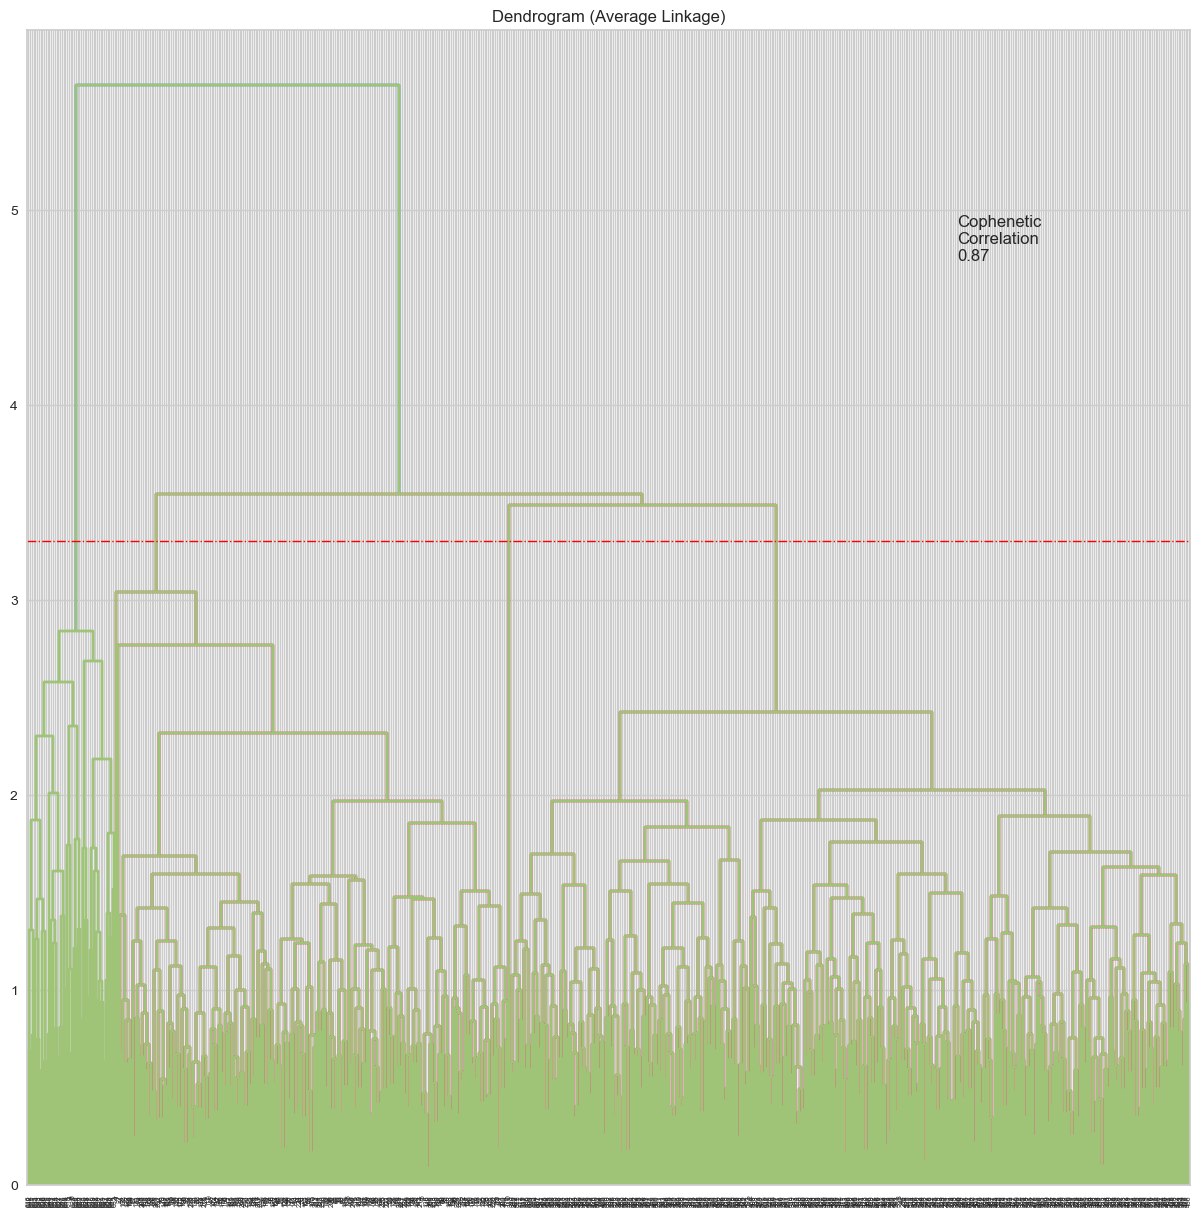

In [44]:
# list of linkage methods
linkage_methods = ["average"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 15))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs)
    axs.set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs.annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )
dendrogram(Z, color_threshold=7.3)
plt.axhline(y=3.3, c="red", lw=1, linestyle="dashdot")

### Creating Final Model

In [45]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")  ## Complete the code to define the hierarchical clustering model
HCmodel.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=4)

In [46]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

In [47]:
hc_df.head()

,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_segments
0,1.246920,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,3
1,-0.653203,0.410293,-0.787585,-1.473731,2.520519,1.891859,0
2,-1.476098,0.410293,1.058973,-0.860451,0.134290,0.145528,2
3,-0.571901,-0.121665,0.135694,-0.860451,-0.547490,0.145528,2
4,-0.300857,1.740187,0.597334,-1.473731,3.202298,-0.203739,1


In [48]:
df2.head()

,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_segments
0,87073,100000,2,1,1,0,3
1,38414,50000,3,0,10,9,0
2,17341,50000,7,1,3,4,2
3,40496,30000,5,1,1,4,2
4,47437,100000,6,0,12,3,1


In [49]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

## Cluster Profiling and Comparison

### Cluster Profiling: K-means Clustering

In [51]:
km_cluster_profile = df1.groupby("K_means_segments").mean()  ## Complete the code to groupby the cluster labels

In [54]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("K_means_segments")["Avg_Credit_Limit"].count().values  ## Complete the code to groupby the cluster labels
)

In [55]:
km_cluster_profile

,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
HC_Clusters,,,,,,,
0,55252.730942,12156.950673,2.403587,0.928251,3.556054,6.883408,223
1,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,172
2,54791.406736,33564.766839,5.520725,3.492228,0.987047,2.010363,50
3,87073.000000,100000.000000,2.000000,1.000000,1.000000,0.000000,215


In [ ]:
Cluster 0

There are 223 customers in this cluster.
The average credit limit of customers is low with 12156.95
Total credit cards are low with 2 credit cards.
Total visits at the bank are low, but the Total visits online are moderate with 4
Total calls made to the bank are high with 7
Cluster 1

There are 172 customers in this cluster.
The average credit limit of customers is high with 141040.95
Total credit cards are high with 9 credit cards.
Total visits at the bank are low, but the Total visits online are high with 11
Total calls made to the bank are low with 1
Cluster 2

There are 50 customers in this cluster.
The average credit limit of customers is moderade with 33564.77
Total credit cards are high with 6 credit cards.
Total visits at the bank are moderade, but the Total visits online are low with 1
Total calls made to the bank are 2
Cluster 3

There are 215 customers in this cluster.
The average credit limit of customers is high with 100000.00
Total credit cards are low with 2 credit cards.
Total visits at the bank & the Total visits online are low with 1 each
Total calls made to the bank are zero



### Cluster Profiling: Hierarchical Clustering

In [56]:
hc_cluster_profile = df2.groupby("HC_segments").mean()

In [57]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Avg_Credit_Limit"].count().values
)

In [58]:
hc_cluster_profile

,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
HC_segments,,,,,,,
0,55252.730942,12156.950673,2.403587,0.928251,3.556054,6.883408,223
1,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,54791.406736,33564.766839,5.520725,3.492228,0.987047,2.010363,386
3,87073.000000,100000.000000,2.000000,1.000000,1.000000,0.000000,1


In [ ]:
Cluster 0

There are 223 customers in this cluster.
The average credit limit of customers is low with 12156.95
Total credit cards are low with 2 credit cards.
Total visits at the bank are low, but the Total visits online are moderate with 4
Total calls made to the bank are high with 7
Cluster 1

There are 50 customers in this cluster.
The average credit limit of customers is high with 141040.00
Total credit cards are high with 9 credit cards.
Total visits at the bank are low, but the Total visits online are high with 11
Total calls made to the bank are low with 1
Cluster 2

There are 386 customers in this cluster.
The average credit limit of customers is moderade with 33564.77
Total credit cards are high with 6 credit cards.
Total visits at the bank are moderade, but the Total visits online are low with 1
Total calls made to the bank are 2
Cluster 3

There are 1 customers in this cluster.
The average credit limit of customers is high with 100000.00
Total credit cards are low with 2 credit cards.
Total visits at the bank & the Total visits online are low with 1 each
Total calls made to the bank are zero


## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
    Same time for execution in both clustering techniques.
- Which clustering technique gave you more distinct clusters, or are they the same?
    On checking the Hierarchical cluster profiles, it's found average linkage give homogeneous clusters despide that 1 cluster has one customer in it. On checking the dendrogram for different linkages further, still the Average linkage gives us homogeneous clusters, with variability between clusters with high cophenetic correlation. 4 appears to be the appropriate number of clusters from the dendrogram for Average linkage.
    On checking the K-means cluster profiles, it's found 4 as the appropriate no. of clusters(K) as the silhouette score is high enough for all the 4-clusters.  K-means cluster gives more distinct and separated clusters or more homogeneous clusters, with variability between clusters.
- How many observations are there in the similar clusters of both algorithms?
    On checking the Hierarchical cluster profiles, cluster 0 has 223 customers as well as on the K-means cluster profiles, but on Hierarchical cluster profiles cluster 3 has only one and on the K-means cluster profiles has 215 customers. More variability between clusters and more homogeneous.
- How many clusters are obtained as the appropriate number of clusters from both algorithms?
  The K-means clustering gave 4 clusters as the appropriate no. of clusters(K) as the silhouette score is high enough for all the 4-clusters
  The Hierarchical cluster gave 4 as the appropriate number of clusters from the dendrogram for Average linkage.
- You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.
  On the Hierarchical cluster profiles, cluster 1 has the lowest customers with 50 customers and on the K-means cluster profiles cluster 2 has the lowest customers with 50 customers.
  Eventhough on Hierarchical cluster profiles cluster 3 has only one and on the K-means cluster profiles cluster 3 has 215 the average credit limit, total credit card, total visit at the bank, total visit online and total call made to the bank are the same.
  

In [59]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
HC_Clusters,,,,,,,
0,55252.730942,12156.950673,2.403587,0.928251,3.556054,6.883408,223
1,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,172
2,54791.406736,33564.766839,5.520725,3.492228,0.987047,2.010363,50
3,87073.000000,100000.000000,2.000000,1.000000,1.000000,0.000000,215


In [60]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
HC_segments,,,,,,,
0,55252.730942,12156.950673,2.403587,0.928251,3.556054,6.883408,223
1,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,54791.406736,33564.766839,5.520725,3.492228,0.987047,2.010363,386
3,87073.000000,100000.000000,2.000000,1.000000,1.000000,0.000000,1


<Axes: xlabel='K_means_segments'>

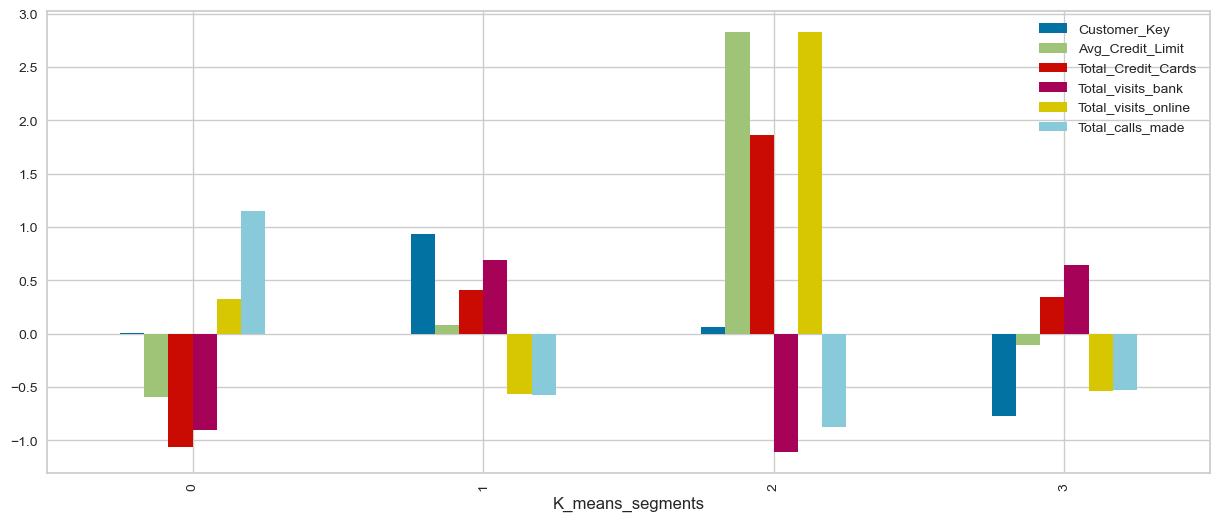

In [61]:
k_means_df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

<Axes: xlabel='HC_segments'>

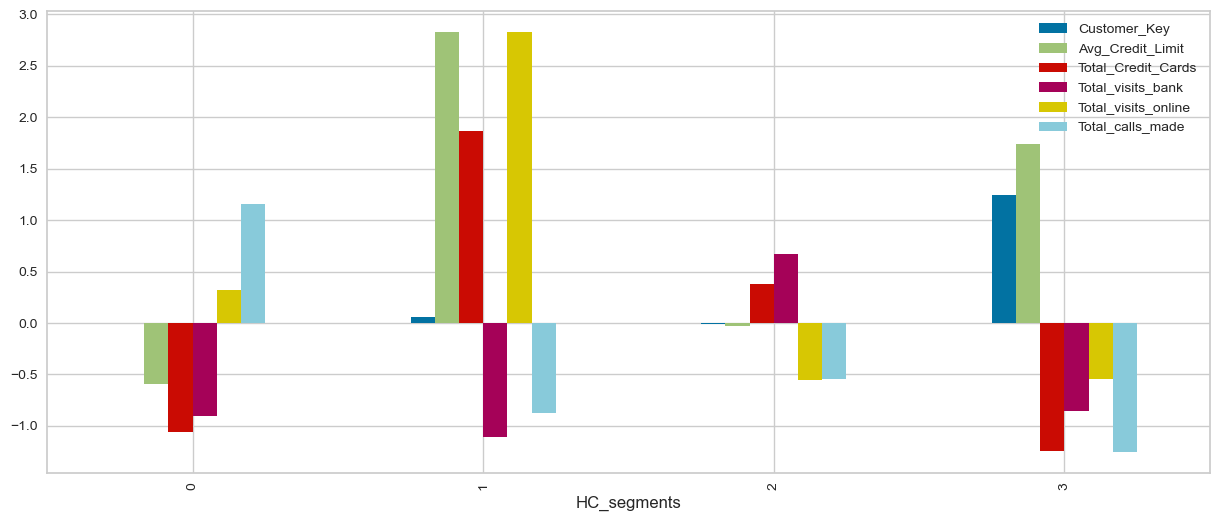

In [62]:
hc_df.groupby("HC_segments").mean().plot.bar(figsize=(15, 6))

In [63]:
k_means_df.loc[k_means_df["K_means_segments"] == 1, "K_means_segments"] = 3
k_means_df.loc[k_means_df["K_means_segments"] == 2, "K_means_segments"] = 1
k_means_df.loc[k_means_df["K_means_segments"] == 3, "K_means_segments"] = 2
df1["K_means_segments"] = k_means_df["K_means_segments"]

km_cluster_profile = df1.groupby("K_means_segments").mean()
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("K_means_segments")["Avg_Credit_Limit"].count().values
)

In [64]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,,
0,55412.762332,12143.497758,2.403587,0.928251,3.551570,6.883408,223
1,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,54782.607235,33744.186047,5.511628,3.485788,0.989664,2.005168,387


<Axes: xlabel='K_means_segments'>

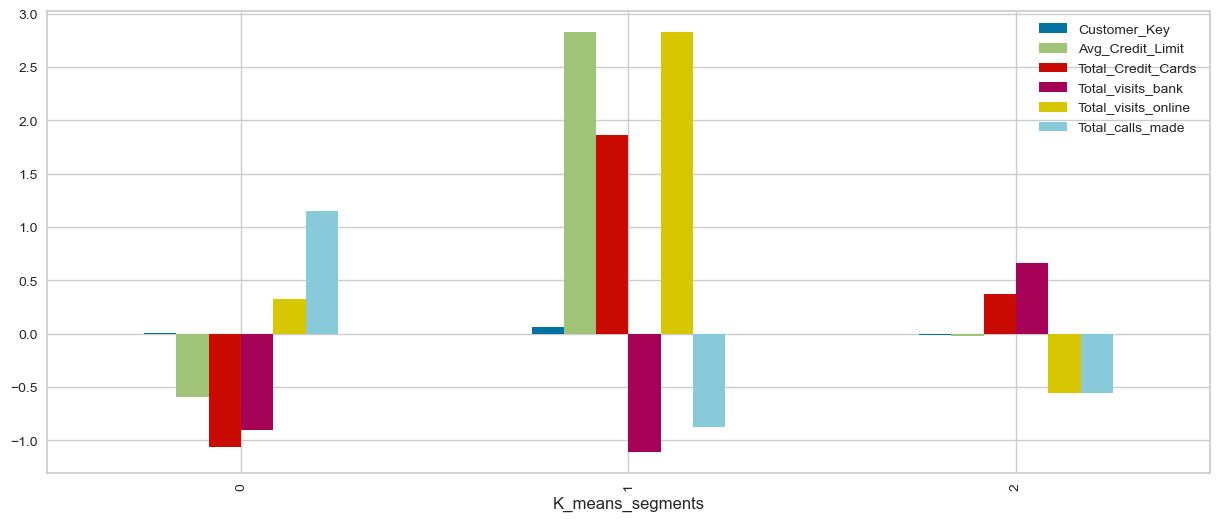

In [65]:
k_means_df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

After combining cluster 3 & 1 from Kmean segments in cluster 2. It became more homogeneous clusters, with more variability between clusters

**Let's create some plots on the original data to understand the customer distribution among the clusters.**

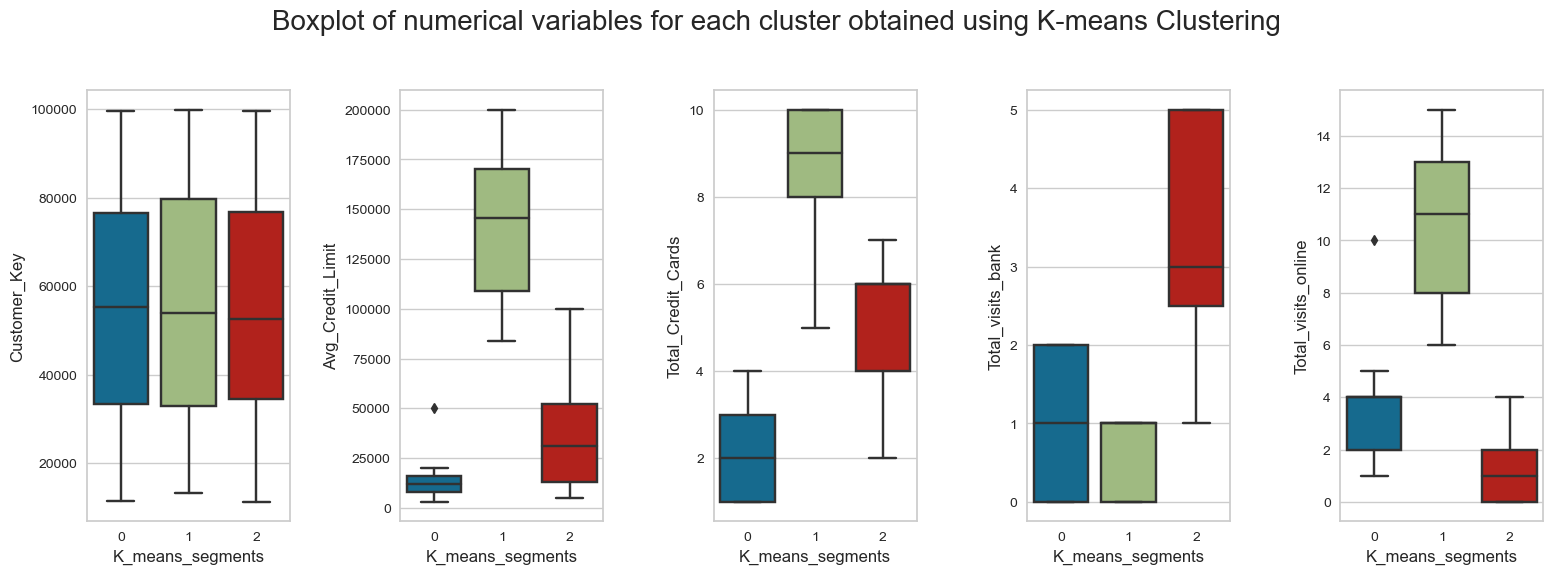

In [66]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle(
    "Boxplot of numerical variables for each cluster obtained using K-means Clustering",
    fontsize=20,
)

counter = 0

for ii in range(5):
    sns.boxplot(
        ax=axes[ii], y=df1[df1.columns[counter]], x=k_means_df["K_means_segments"]
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

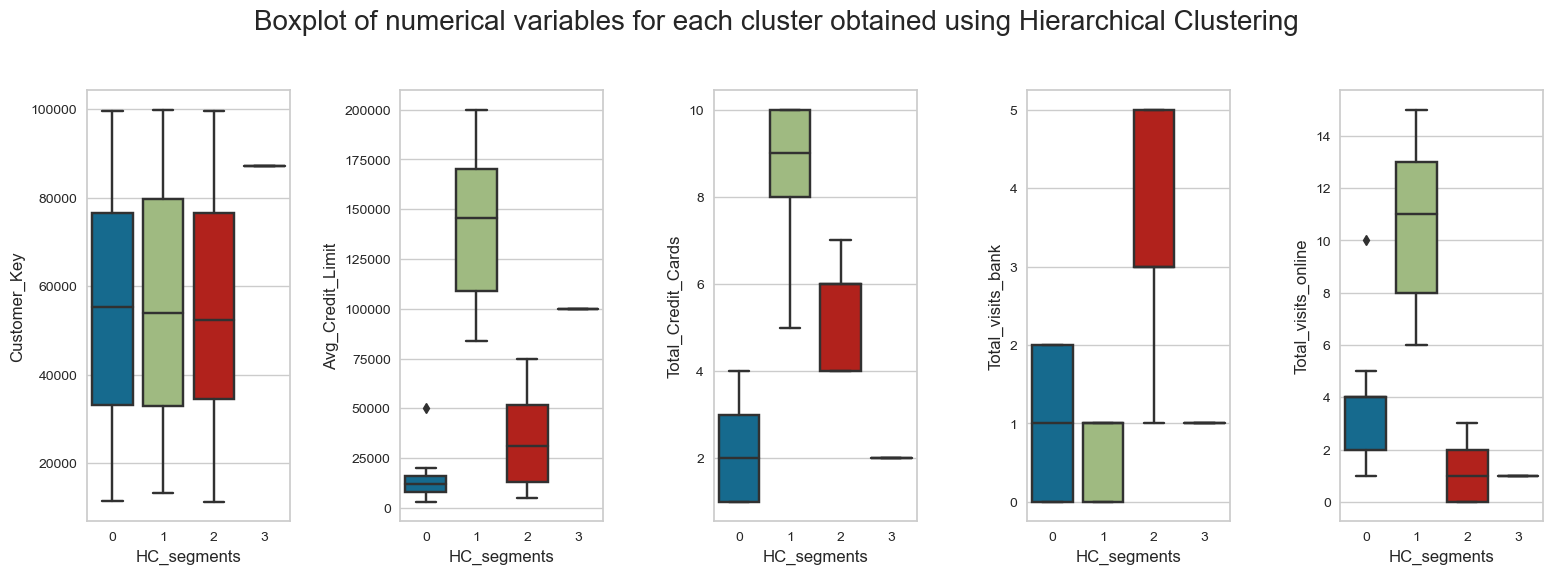

In [67]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle(
    "Boxplot of numerical variables for each cluster obtained using Hierarchical Clustering",
    fontsize=20,
)

counter = 0

for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df2[df2.columns[counter]], x=hc_df["HC_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

## Actionable Insights and Recommendations

##Insights 
We will look into clusters 0, 1, and 2 only because cluster 3 have only 1 custoomer in it. Both Hierarchical Clustering & K-means Clustering are very similar except for a small change in cluster 2 on Total visit Online & Average Credit Limit.
- **Cluster 0**

There are 223 customers in this cluster.
The average credit limit of customers is low with 12156.95
Total credit cards are low with 2 credit cards.
Total visits at the bank are low, but the Total visits online are moderate with 4
Total calls made to the bank are high with 7
- **Cluster 1**

There are 50 customers in this cluster.
The average credit limit of customers is high with 141040.00
Total credit cards are high with 9 credit cards.
Total visits at the bank are low, but the Total visits online are high with 11
Total calls made to the bank are low with 1
- **Cluster 2**

There are 387 customers in this cluster.
The average credit limit of customers is moderade with 33744.19
Total credit cards are high with 6 credit cards.
Total visits at the bank are moderade, but the Total visits online are low with 1
Total calls made to the bank are 2

## Recommendations

**Cluters 0 customers are good places for AllLife Bank to focus on marketing campaigns to target customers with low Total credit cards & Total visits at the bank to increse customers service & upsell existing customers at the bank based on cluster profiling done.**
**Cluters 1 customers are good places for AllLife Bank to focus on marketing campaigns to target customers with low Total visits at the bank to increse customers service at the bank and to target new customers based on cluster profiling done.**
**Cluters 2 customers are good places for AllLife Bank to focus on marketing campaigns to target customers with low Total visits online at the bank to increse customers service at the bank based on cluster profiling done.**




___